## K-Fold Cross Validation in Python using the Boston Housing Dataset

In [1]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Read dataset from a csv file
df=pd.read_csv('HouseData.csv')

In [3]:
#understand the dataset
df.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


In [4]:
df.size


5621

In [5]:
df.isnull().sum().sum()

5

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64

### We now split the data into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=42)

## importing essential libraries to perform kfold and cross validation

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score## we now perform the k fold validation
from sklearn.linear_model import LinearRegression

In [10]:

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()


scores = cross_val_score(model, X, y, cv=cv,scoring='neg_mean_absolute_error')

In [11]:
scores

array([-3.46050769, -4.99562257, -2.72706446, -4.44767641, -2.51470891,
       -4.94121624, -3.95948613, -3.32864439, -3.74378558, -3.9418705 ])

In [12]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
mean(absolute(scores))

3.8060582869968727

### For 10 folds we are getting an everage MAE of about 3.80. This is the average over 10 folds.

In [13]:
# Let us visualize what the distribution of MAE looks like over our 10 folds

<BarContainer object of 10 artists>

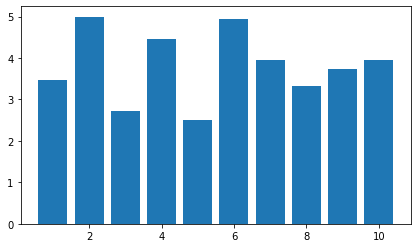

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.bar(np.arange(1,11), np.absolute(scores))

## Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

## In this notebook, we have successfully divided our training dataset into 10 subsets (10 folds) and found the average error our model would generate. This is a great technique if you want to evaluate several ML algorithms over a particular dataset.